# Лабораторная работа 2

## Линейная регрессия

### Метод наименьших квадратов: постановка задачи

Рассмотрим систему уравнений $Xa = y$, в которой $a$ &mdash; столбец неизвестных. Её можно переписать в векторном виде
$$x_1 a_1 + x_2 a_2 + \ldots + x_k a_k = y,$$
где $x_1,\ldots,x_n$ &mdash; столбцы матрицы $X$. Таким образом, решить исходную систему означает найти линейную комбинацию векторов $x_1,\ldots,x_n$, равную правой части. Но что делать, если такой линейной комбинации не существует? Геометрически это означает, что вектор $y$ не лежит в подпространстве $U = \langle x_1,\ldots, x_k\rangle$. В этом случае мы можем найти *псевдорешение*: вектор коэффициентов $\hat{a}$, для которого линейная комбинация $x_1 \hat{a}_1 + x_2 \hat{a}_2 + \ldots + x_k \hat{a}_k$ хоть и не равна в точности $y$, но является наилучшим приближением &mdash; то есть ближайшей к $y$ точкой $\hat{y}$ подпространства $U$ (иными словами, ортогональной проекцией $y$ на это подпростанство). Итак, цель наших исканий можно сформулировать двумя эквивалентными способами:

1. Найти вектор $\hat{a}$, для которого длина разности $|X\hat{a} - y|$ минимальна (отсюда название "метод наименьших квадратов");
2. Найти ортогональную проекцию $\hat{y}$ вектора $y$ на подпространство $U$ и представить её в виде $X\hat{a}$.

Далее мы будем предполагать, что векторы $x_1,\ldots,x_n$ линейно независимы (если нет, то сначала имеет смысл выделить максимальную линейно независимую подсистему).

На лекциях было показано, что проекция вектора $y$ на подпространство $U = \langle x_1,\ldots, x_k\rangle$ записывается в виде
$$\hat{y} = X\left(X^TX\right)^{-1}X^Ty,$$
и, соответственно, искомый вектор $\hat{a}$ равен
$$\hat{a} = \left(X^TX\right)^{-1}X^Ty.$$

### Задача линейной регрессии

Начнём с примера. Допустим, вы хотите найти зависимость среднего балла S студента ФКН от его роста H, веса W, длины волос L и N &mdash; количества часов, которые он ежедневно посвящает учёбе. Представьте, что мы измерили все эти параметры для $n$ студентов и получили наборы значений $S_1,\ldots, S_n$, $H_1,\ldots, H_n$ и так далее.

Тут можно подбирать много разных умных моделей, но начать имеет смысл с самой простой, линейной:
$$S = a_1H + a_2W + a_3L + a_4N + a_5.$$
Конечно, строгой линейной зависимости нет (иначе можно было бы радостно упразднить экзамены), но мы можем попробовать подобрать коэффициенты $a_1, a_2, a_3, a_4, a_5$, для которых отклонение правой части от наблюдаемых было бы наименьшим:
$$\sum_{i=1}^n\left(S_i - ( a_1H_i + a_2W_i + a_3L_i + a_4N_i + a_5)\right)^2 \longrightarrow \min$$
И сразу видно, что мы получили задачу на метод наименьших квадратов! А именно, у нас
$$X =
\begin{pmatrix}
H_1 & W_1 & L_1 & N_1 & 1\\
H_2 & W_2 & L_2 & N_2 & 1\\
\dots & \dots & \dots & \dots & \dots \\
H_n & W_n & L_n & N_n & 1
\end{pmatrix},\qquad y=
\begin{pmatrix}
S_1\\ S_2\\ \vdots \\ S_n
\end{pmatrix}$$

Решая эту задачу с помощью уже известных формул, получаем оценки коэффициентов $\hat{a}_i$ ($i = 1\ldots,5$).

Теперь проговорим общую постановку задачи линейной регрессии. У нас есть $k$ переменных $x_1,\ldots,x_k$ ("регрессоров"), через которые мы хотим выразить "объясняемую переменную" $y$:
$$y = a_1x_1 + a_2x_2 + \ldots + a_kx_k$$
Значения всех переменных мы измерили $n$ раз (у $n$ различных объектов, в $n$ различных моментов времени &mdash; это зависит от задачи). Подставим эти данные в предыдущее равенство:
$$\begin{pmatrix}
y_1\\ y_2 \\ \vdots \\ y_n
\end{pmatrix} = 
a_1\begin{pmatrix}
x_{11} \\ x_{21} \\ \vdots \\ x_{n1} \end{pmatrix} + a_2\begin{pmatrix}
x_{12} \\ x_{22} \\ \vdots \\ x_{n2} \end{pmatrix} + \ldots + a_k\begin{pmatrix}
x_{1k} \\ x_{2k} \\ \vdots \\ x_{nk} \end{pmatrix}$$
(здесь $x_{ij}$ &mdash; это значение $j$-го признака на $i$-м измерении). Это удобно переписать в матричном виде:
$$\begin{pmatrix}
x_{11} & x_{12} & \ldots & x_{1k}\\
x_{21} & x_{22} & \ldots & x_{2k}\\
\dots & \dots & \dots & \dots\\
x_{n1} & x_{n2} & \ldots & x_{nk}
\end{pmatrix} \cdot
\begin{pmatrix}
a_1 \\ a_2 \\ \vdots \\ a_k
\end{pmatrix} = 
\begin{pmatrix}
y_1 \\ y_2 \\ \vdots \\ y_n
\end{pmatrix}$$
или коротко $Xa = y$. Поскольку на практике эта система уравнений зачастую не имеет решения (ибо зависимости в жизни редко бывают действительно линейными), методом наименьших квадратов ищется псевдорешение.

### Оценка качества. Обобщающая способность. Обучение и тест 

После того, как вы построили регрессию и получили какую-то зависимость объясняемой переменной от регрессоров, настаёт время оценить качество регрессии. Есть много разных функционалов качества; мы пока будем говорить только о самом простом и очевидном из них &mdash; о среднеквадратичной ошибке (mean square error). Она равна
$$\frac1{n}|X\hat{a} - y|^2 = \frac1{n}\sum_{i=1}^n\left(\hat{a}_1x_{i1} + \hat{a}_2x_{i2} + \ldots + \hat{a}_kx_{ik} - y_i\right)^2$$

В целом хочется искать модели с наименьшей mean square error на имеющихся данных. Однако слишком фанатичная гонка за минимизацией ошибки может привести к печальным последствиям. Например, если мы приближаем функцию одной переменной по значениям в $n$ точках, то наилучшей с точки зрения этой ошибки моделью будет многочлен $(n-1)$-й степени, для которого эта ошибка будет равна нулю.  Тем не менее, вряд ли истинная зависимость имеет вид многочлена большой степени. Более того, значения вам скорее всего даны с погрешностью, то есть вы подогнали вашу модель под свои зашумлённые данные, но на любых других данных (то есть в других точках) точность, скорее всего, окажется совсем не такой хорошей. Этот эффект называют **переобучением**; говорят также, что **обобщающая способность** модели оказалась скверной.

Чтобы не попадать в эту ловушку, данные обычно делят на обучающие (по которым строят модель и оценивают коэффициенты) и тестовые. Лучшей стоит счесть ту модель, для которой значение функционала качества будет меньше.

### Задание 1. Метод наименьших квадратов (4 балла)

Скачайте файлы ``train.txt`` и ``test.txt``. В первом из них находится обучающая выборка, а во втором &mdash; тестовая. Каждый из файлов содержит два столбца чисел, разделённых пробелами: в первом &mdash; $n$ точек (значения аргумента $x$), во втором &mdash; значения некоторой функции $y = f(x)$ в этих точках, искажённые случайным шумом. Ваша задача &mdash; по обучающей выборке подобрать функцию $y = g(x)$, пристойно приближающую неизвестную вам зависимость.

Загрузим обучающие и тестовые данные (не забудьте ввести правильный путь!).

In [2]:
import numpy
from scipy import linalg
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
#  matplot settings

large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
%matplotlib inline

In [4]:
data_train = numpy.loadtxt('./train.txt', delimiter=',')
data_test = numpy.loadtxt('./test.txt', delimiter=',')

Разделим значения $x$ и $y$

In [5]:
X_train = data_train[:,0]
y_train = data_train[:,1]

X_test = data_test[:, 0]
y_test = data_test[:, 1]

Найдите с помощью метода наименьших квадратов линейную функцию ($y = kx + b$), наилучшим образом приближающую неизвестную зависимость. Полезные функции: ``numpy.ones(n)`` для создания массива из единиц длины $n$ и ``numpy.concatenate((А, В), axis=1)`` для слияния двух матриц по столбцам (пара ``А`` и ``В`` превращается в матрицу ``[A B]``).

<div style="
        background-color: #FFF3C2;
        padding: 6px;
        border-radius: 7px;
    ">
$y = kx + b \Leftrightarrow y = (1\: X)\cdot
\begin{pmatrix}
b\\
k\\
\end{pmatrix}$, где $1$ нужно понимать как столбец единиц.
    
</div>

In [6]:
#  solution using default fornula 
def undefined_approximation():
    X_train_cpy = numpy.array([X_train.copy()]).T
    y_train_cpy = y_train.copy()
    data_amount = X_train.size
    ones_column = numpy.array([numpy.ones([data_amount])]).T
    X_matrix = numpy.concatenate((ones_column, X_train_cpy), 1)
    pseudosolution = numpy.dot(
        numpy.dot(
            linalg.inv(
                numpy.dot(X_matrix.T.copy(), X_matrix)
            ),
            X_matrix.T.copy()
            ),
        y_train_cpy
    )
    return pseudosolution.reshape(-1)

# solution using QR-decomposition
def undefined_approximation_qr():
    X_train_cpy = numpy.array([X_train.copy()]).T
    y_train_cpy = y_train.copy()
    data_amount = X_train.size
    ones_column = numpy.array([numpy.ones([data_amount])]).T
    X_matrix = numpy.concatenate((ones_column, X_train_cpy), 1)
    Q, R = linalg.qr(X_matrix, mode="economic")
    pseudosolution = numpy.dot(
        numpy.dot(linalg.inv(R), Q.T),
        y_train_cpy
    )
    return pseudosolution.reshape(-1)

In [7]:
b, k = undefined_approximation()
print("default formula:\ty =", k, "x +", b)
b_qr, k_qr = undefined_approximation_qr()
print("QR-decomposition:\t y =", k, "x +", b)

default formula:	y = 2.2791344980519463 x + 4.433230905064935
QR-decomposition:	 y = 2.2791344980519463 x + 4.433230905064935


Нарисуйте на плоскости точки $(x_i, y_i)$ и полученную линейную функцию. Глядя на данные, подумайте, многочленом какой степени можно было бы лучше всего приблизить эту функцию. Найдите этот многочлен и нарисуйте его график.

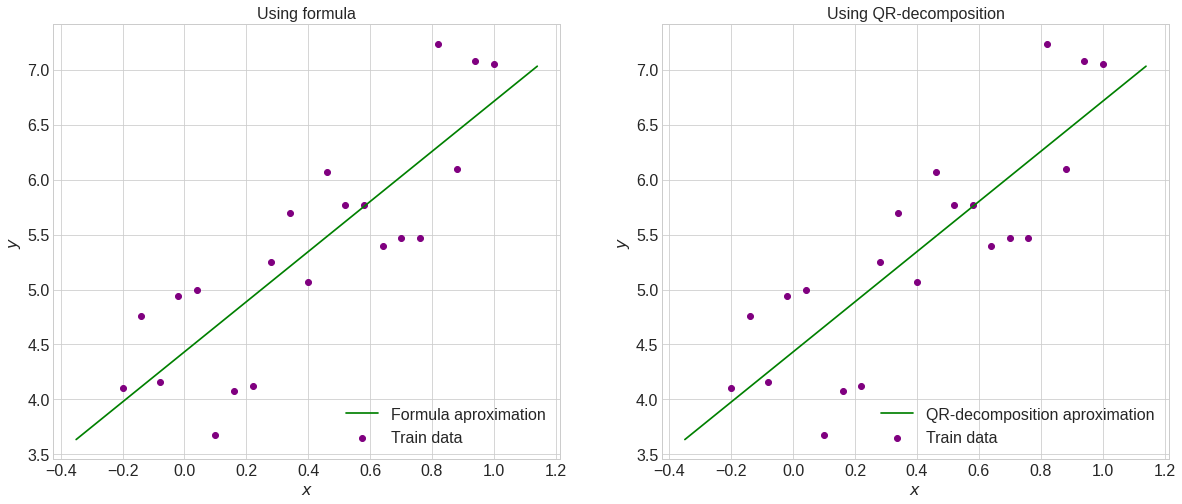

In [8]:
step = 0.01  #optional
left, right = min(X_train) - 15 * step, max(X_train) + 15 * step
xplot = numpy.arange(left, right, step)
yplot = [k * val + b for val in xplot]
yplot_qr = [k_qr * val + b_qr for val in xplot]

fig, (ax1, ax2) = plt.subplots(
    nrows=1, ncols=2,
    figsize=(20, 8)
)

ax1.plot(xplot, yplot, c="g", lw=1.7, label="Formula aproximation")
ax1.scatter(X_train, y_train, c="purple", label="Train data")
ax1.set_title("Using formula")
ax1.legend(loc=4)
ax1.set_xlabel(r'$x$')
ax1.set_ylabel(r'$y$')

ax2.plot(xplot, yplot, c="g", lw=1.7, label="QR-decomposition aproximation")
ax2.scatter(X_train, y_train, c="purple", label="Train data")
ax2.set_title("Using QR-decomposition")
ax2.legend(loc=4)
ax2.set_xlabel(r'$x$')
ax2.set_ylabel(r'$y$')

plt.show()

<div style="
        background-color: #FFF3C2;
        padding: 6px;
        border-radius: 7px;
    ">
    Лучше всего функцию приблизит линия, которая проходит через все точки на графике, например многочлен $\: f(x)$, такой что при подстановке в него $x_1$ он возвращает $y_1$, при подстановке $x_2,\: f(x_2) = y_2$ и т.д. Как искать многочлен степени $k$? Ну, в общем виде он записывается как $f(x) = a_0 + a_1x + \cdots + a_kx^k$, перепишем его в матричном виде:
$$
\begin{pmatrix}
1 & x & x^2 & \cdots & x^k
\end{pmatrix}
\cdot
\begin{pmatrix}
a_0\\
a_1\\
\vdots\\
a_k
\end{pmatrix}
= f(x)
$$
Теперь если речь идёт об $n$ точках в выборке, то это матричное уравнение принимает следующий вид:

$$
\begin{pmatrix}
1 & x_1 & x_1^2 & \cdots & x_1^k\\
1 & x_2 & x_2^2 & \cdots & x_2^k\\
\vdots & \vdots & \vdots & \ddots & \vdots\\
1 & x_n & x_n^2 & \cdots & x_n^k\\
\end{pmatrix}
\cdot
\begin{pmatrix}
a_0\\
a_1\\
\vdots\\
a_k
\end{pmatrix}
=
\begin{pmatrix}
f(x_1)\\
f(x_2)\\
\vdots\\
f(x_n)\\
\end{pmatrix}
$$
</div>

In [9]:
def polynom(X_data, y_data, degree):
    X_data_cpy = X_data.copy()
    y_data_cpy = y_data.copy()
    data_amount = X_data.size
    X_matrix = numpy.array([numpy.ones(data_amount)]).T
    for deg in range(1, degree + 1):
        additional_column = numpy.array([X_data_cpy]).T ** deg
        X_matrix = numpy.concatenate((X_matrix, additional_column), 1)
    pseudosolution = numpy.dot(
        numpy.dot(
            linalg.inv(
                numpy.dot(X_matrix.T.copy(), X_matrix)
            ),
            X_matrix.T.copy()
            ),
        y_data_cpy
    )
    return pseudosolution.reshape(-1)

def val_in_dot(polynom, dot):
    res = 0
    for deg, coeff in enumerate(polynom):
        res += coeff * dot ** deg
    return res

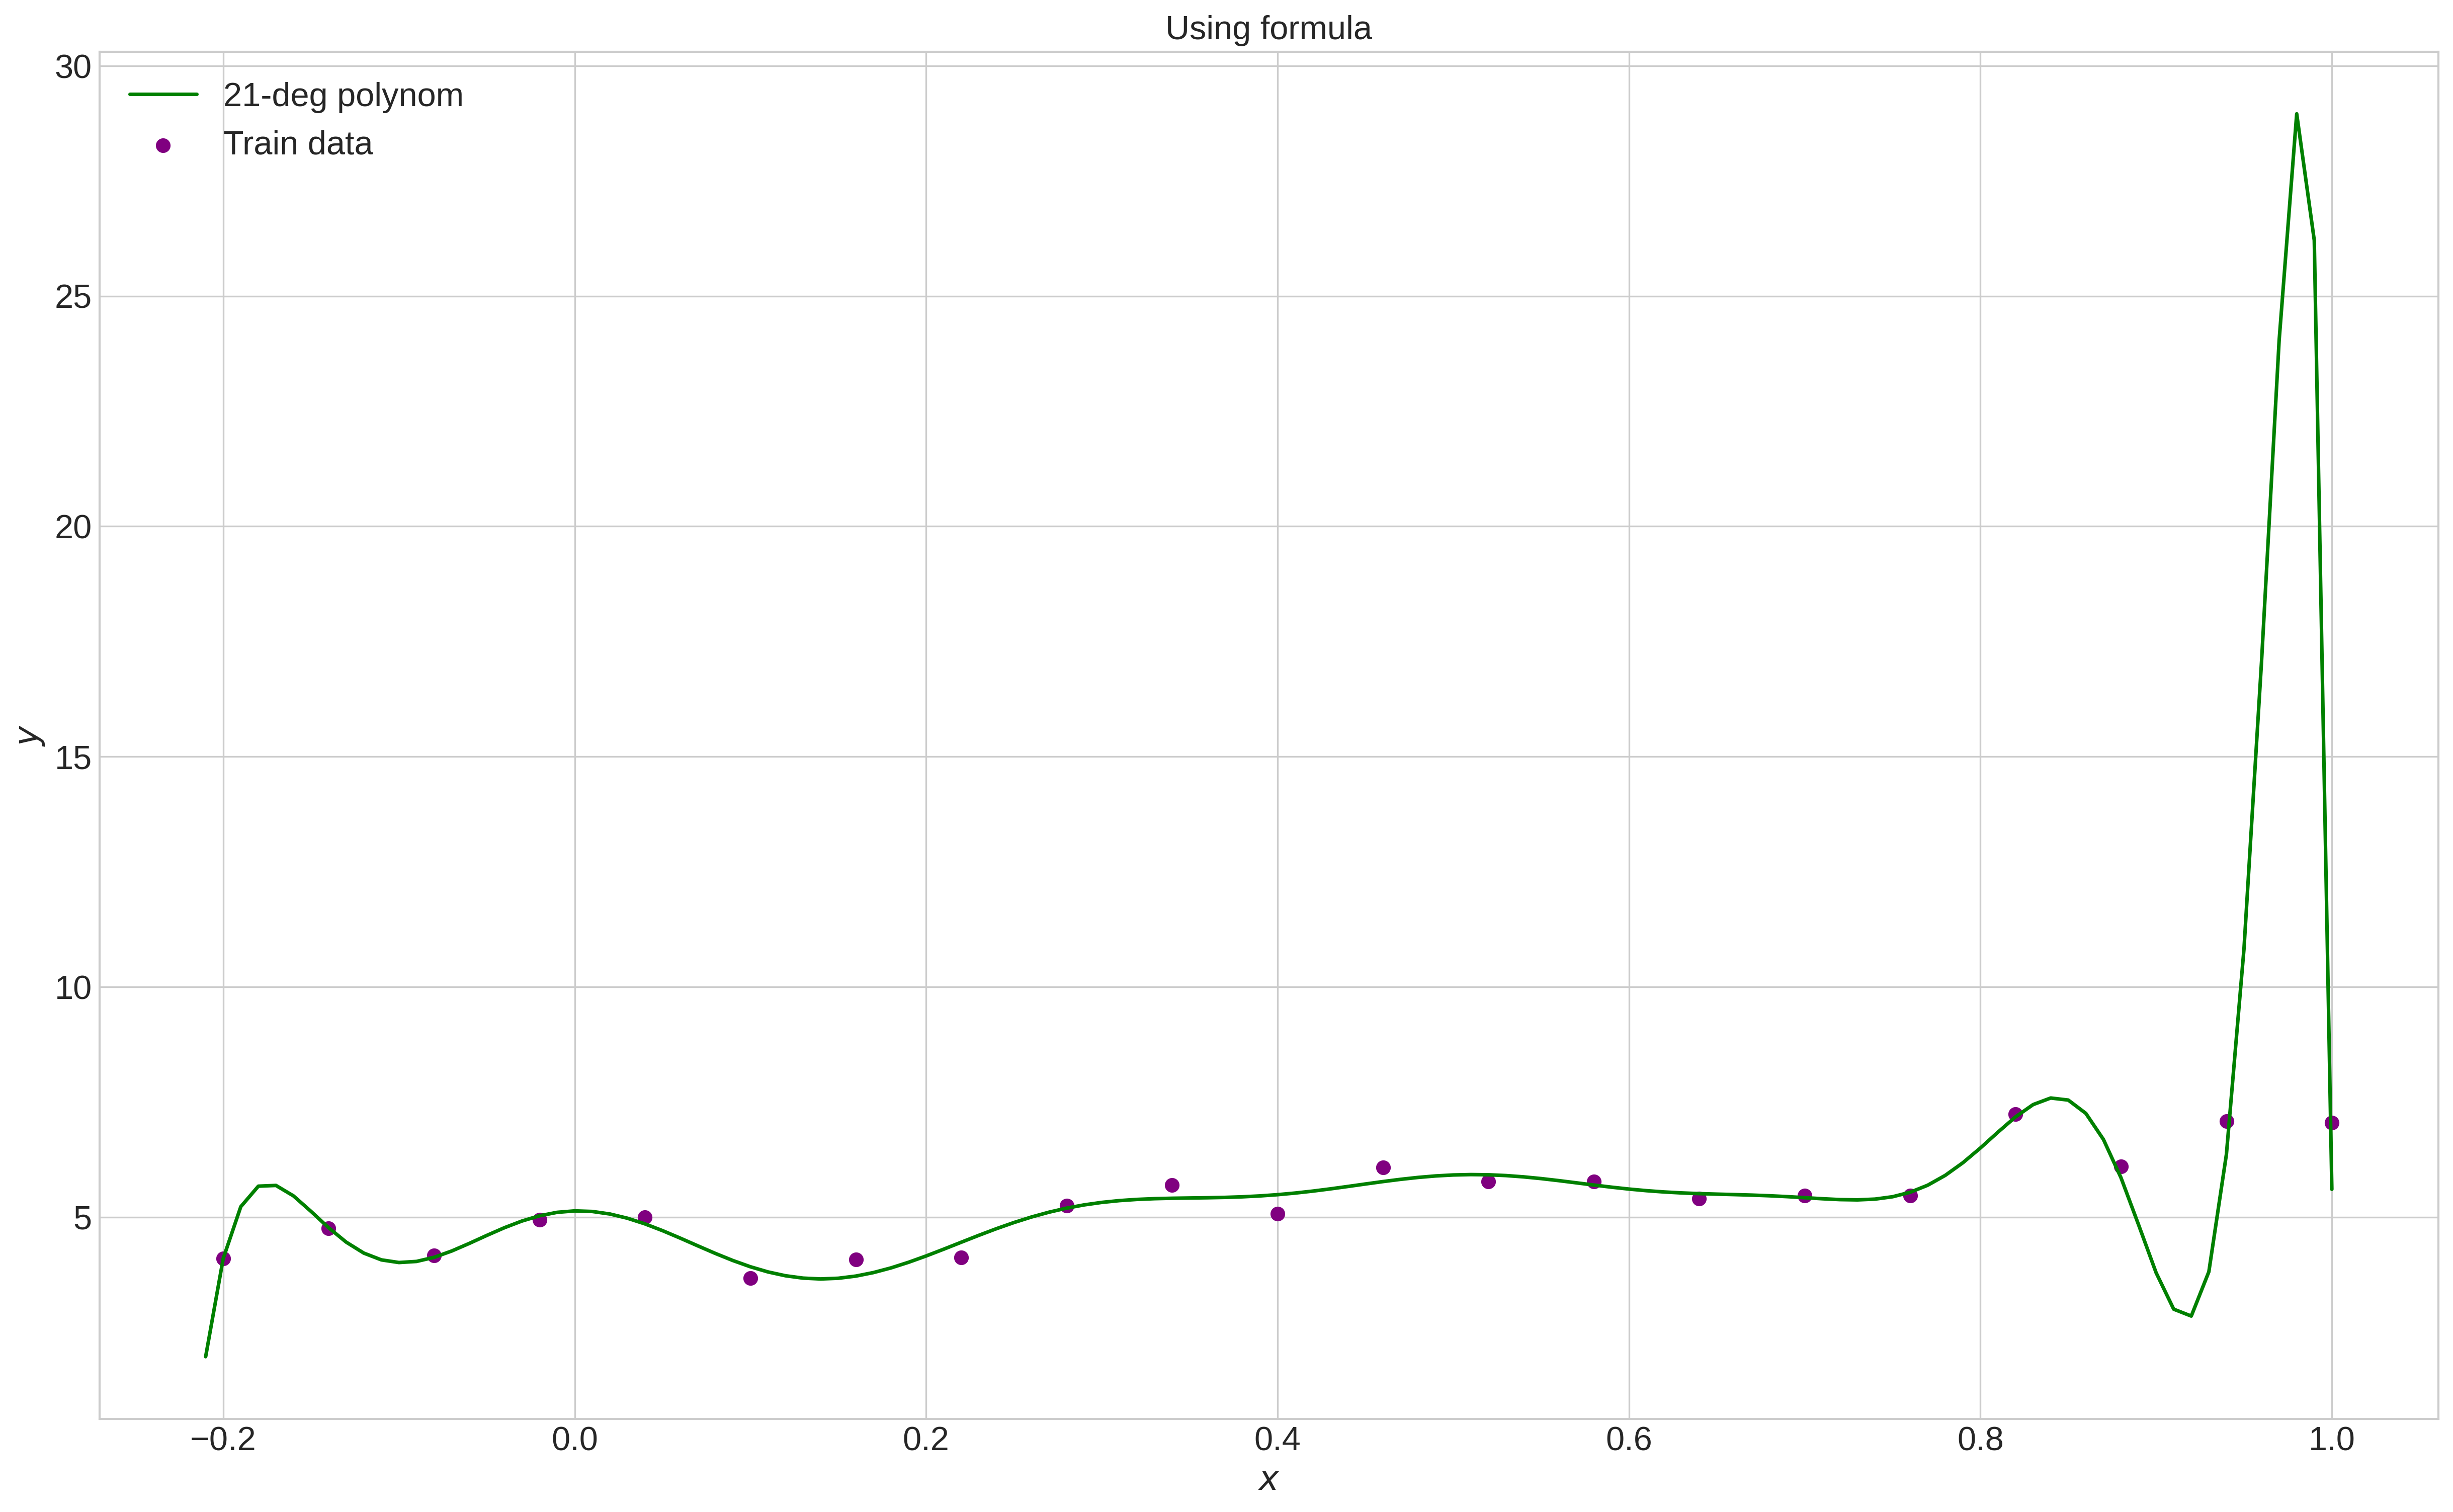

In [10]:
polynom_21 = polynom(X_train, y_train, 21)
x_plot_univ = xplot[14:xplot.size - 14]
y_plot_21 = [val_in_dot(polynom_21, val) for val in x_plot_univ]
fig, ax = plt.subplots(
    figsize=(20, 12),
    dpi=300
)

ax.plot(x_plot_univ, y_plot_21, c="g", label="21-deg polynom", lw=1.7)
ax.scatter(X_train, y_train, c="purple", label="Train data")
ax.set_title("Using formula")
ax.legend(loc=2)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')

plt.show()

 Для $k = 1,2,3,\ldots,10$ найдите многочлен $\hat{f}_k$ степени $k$, наилучшим образом приближающий неизвестную зависимость. Для каждого из них найдите среднеквадратическую ошибку на обучающих данных и на тестовых данных: $\frac1{n}\sum_{i=1}^n\left( \hat{f}_k(x_i) - y_i \right)^2$ (в первом случае сумма ведётся по парам $(x_i, y_i)$ из обучающих данных, а во втором - по парам из тестовых данных).

Для $k = 1,2,3,4,6$ напечатайте коэффициенты полученных многочленов и нарисуйте их графики на одном чертеже вместе с точками $(x_i, y_i)$ (возможно, график стоит сделать побольше; это делается командой `plt.figure(figsize=(width, height))`).

In [11]:
def mean_squad_error(x_data, y_data, polynom, valueable_func=val_in_dot):
    n = x_data.shape[0]
    squad_sum = 0
    for i in range(n):
        squad_sum += (valueable_func(polynom, x_data[i]) - y_data[i]) ** 2
    squad_sum /= n
    return squad_sum

MSE для многочлена степени $k = 1, 2, 3, \cdots, 10$ на трениновочных и тестовых данных:

In [12]:
for k in range(1, 11):
    poly_train = polynom(X_train, y_train, k)
#     poly_test = polynom(X_test, y_test, k)
    print("Deg = ", k, ";\tMSE on train: ", mean_squad_error(X_train, y_train, poly_train),
         ";\tMSE on test: ", mean_squad_error(X_test, y_test, poly_train), sep="")

Deg = 1;	MSE on train: 0.29689663326251964;	MSE on test: 0.4351202004048878
Deg = 2;	MSE on train: 0.2696989158766915;	MSE on test: 0.35647628878312443
Deg = 3;	MSE on train: 0.26949718714796095;	MSE on test: 0.355346457151855
Deg = 4;	MSE on train: 0.2610665330579273;	MSE on test: 0.4417270189282202
Deg = 5;	MSE on train: 0.2499850464831757;	MSE on test: 0.5579732021664396
Deg = 6;	MSE on train: 0.18829348988370298;	MSE on test: 2.5816929329431764
Deg = 7;	MSE on train: 0.18539621153294283;	MSE on test: 2.5157828897677597
Deg = 8;	MSE on train: 0.1590555657908889;	MSE on test: 4.357288820147334
Deg = 9;	MSE on train: 0.15847184274734258;	MSE on test: 4.7763383913013
Deg = 10;	MSE on train: 0.15316611010105427;	MSE on test: 14.631136029363088


Коэффициенты многочлена степени $k = 1, 2, 3, 4, 5, 6$ (от младшей степени к старшей):

In [13]:
for k in range(1, 7):
    poly = polynom(X_train, y_train, k)
    print("k = ", k, ".\tCoeffs: ", *[str(coeff) + "\t" for coeff in poly], sep="")

k = 1.	Coeffs: 4.433230905064935	2.2791344980519463	
k = 2.	Coeffs: 4.472476503404165	1.157831688359733	1.4016285121152756	
k = 3.	Coeffs: 4.460736355285101	1.065016105285245	1.859750837260861	-0.38176860428786874	
k = 4.	Coeffs: 4.341166120399745	1.1718023926319185	6.794091784357828	-13.051328119989556	7.91847469731303	
k = 5.	Coeffs: 4.431297813822753	-0.13059803987310237	3.274714401841827	21.374796276158094	-51.13148138529617	29.524978041310597	
k = 6.	Coeffs: 4.383795011024226	-4.597179324670054	16.002903989515488	121.25709711897665	-481.51013284383396	581.453298191447	-229.97013339772235	


Рисуночек:

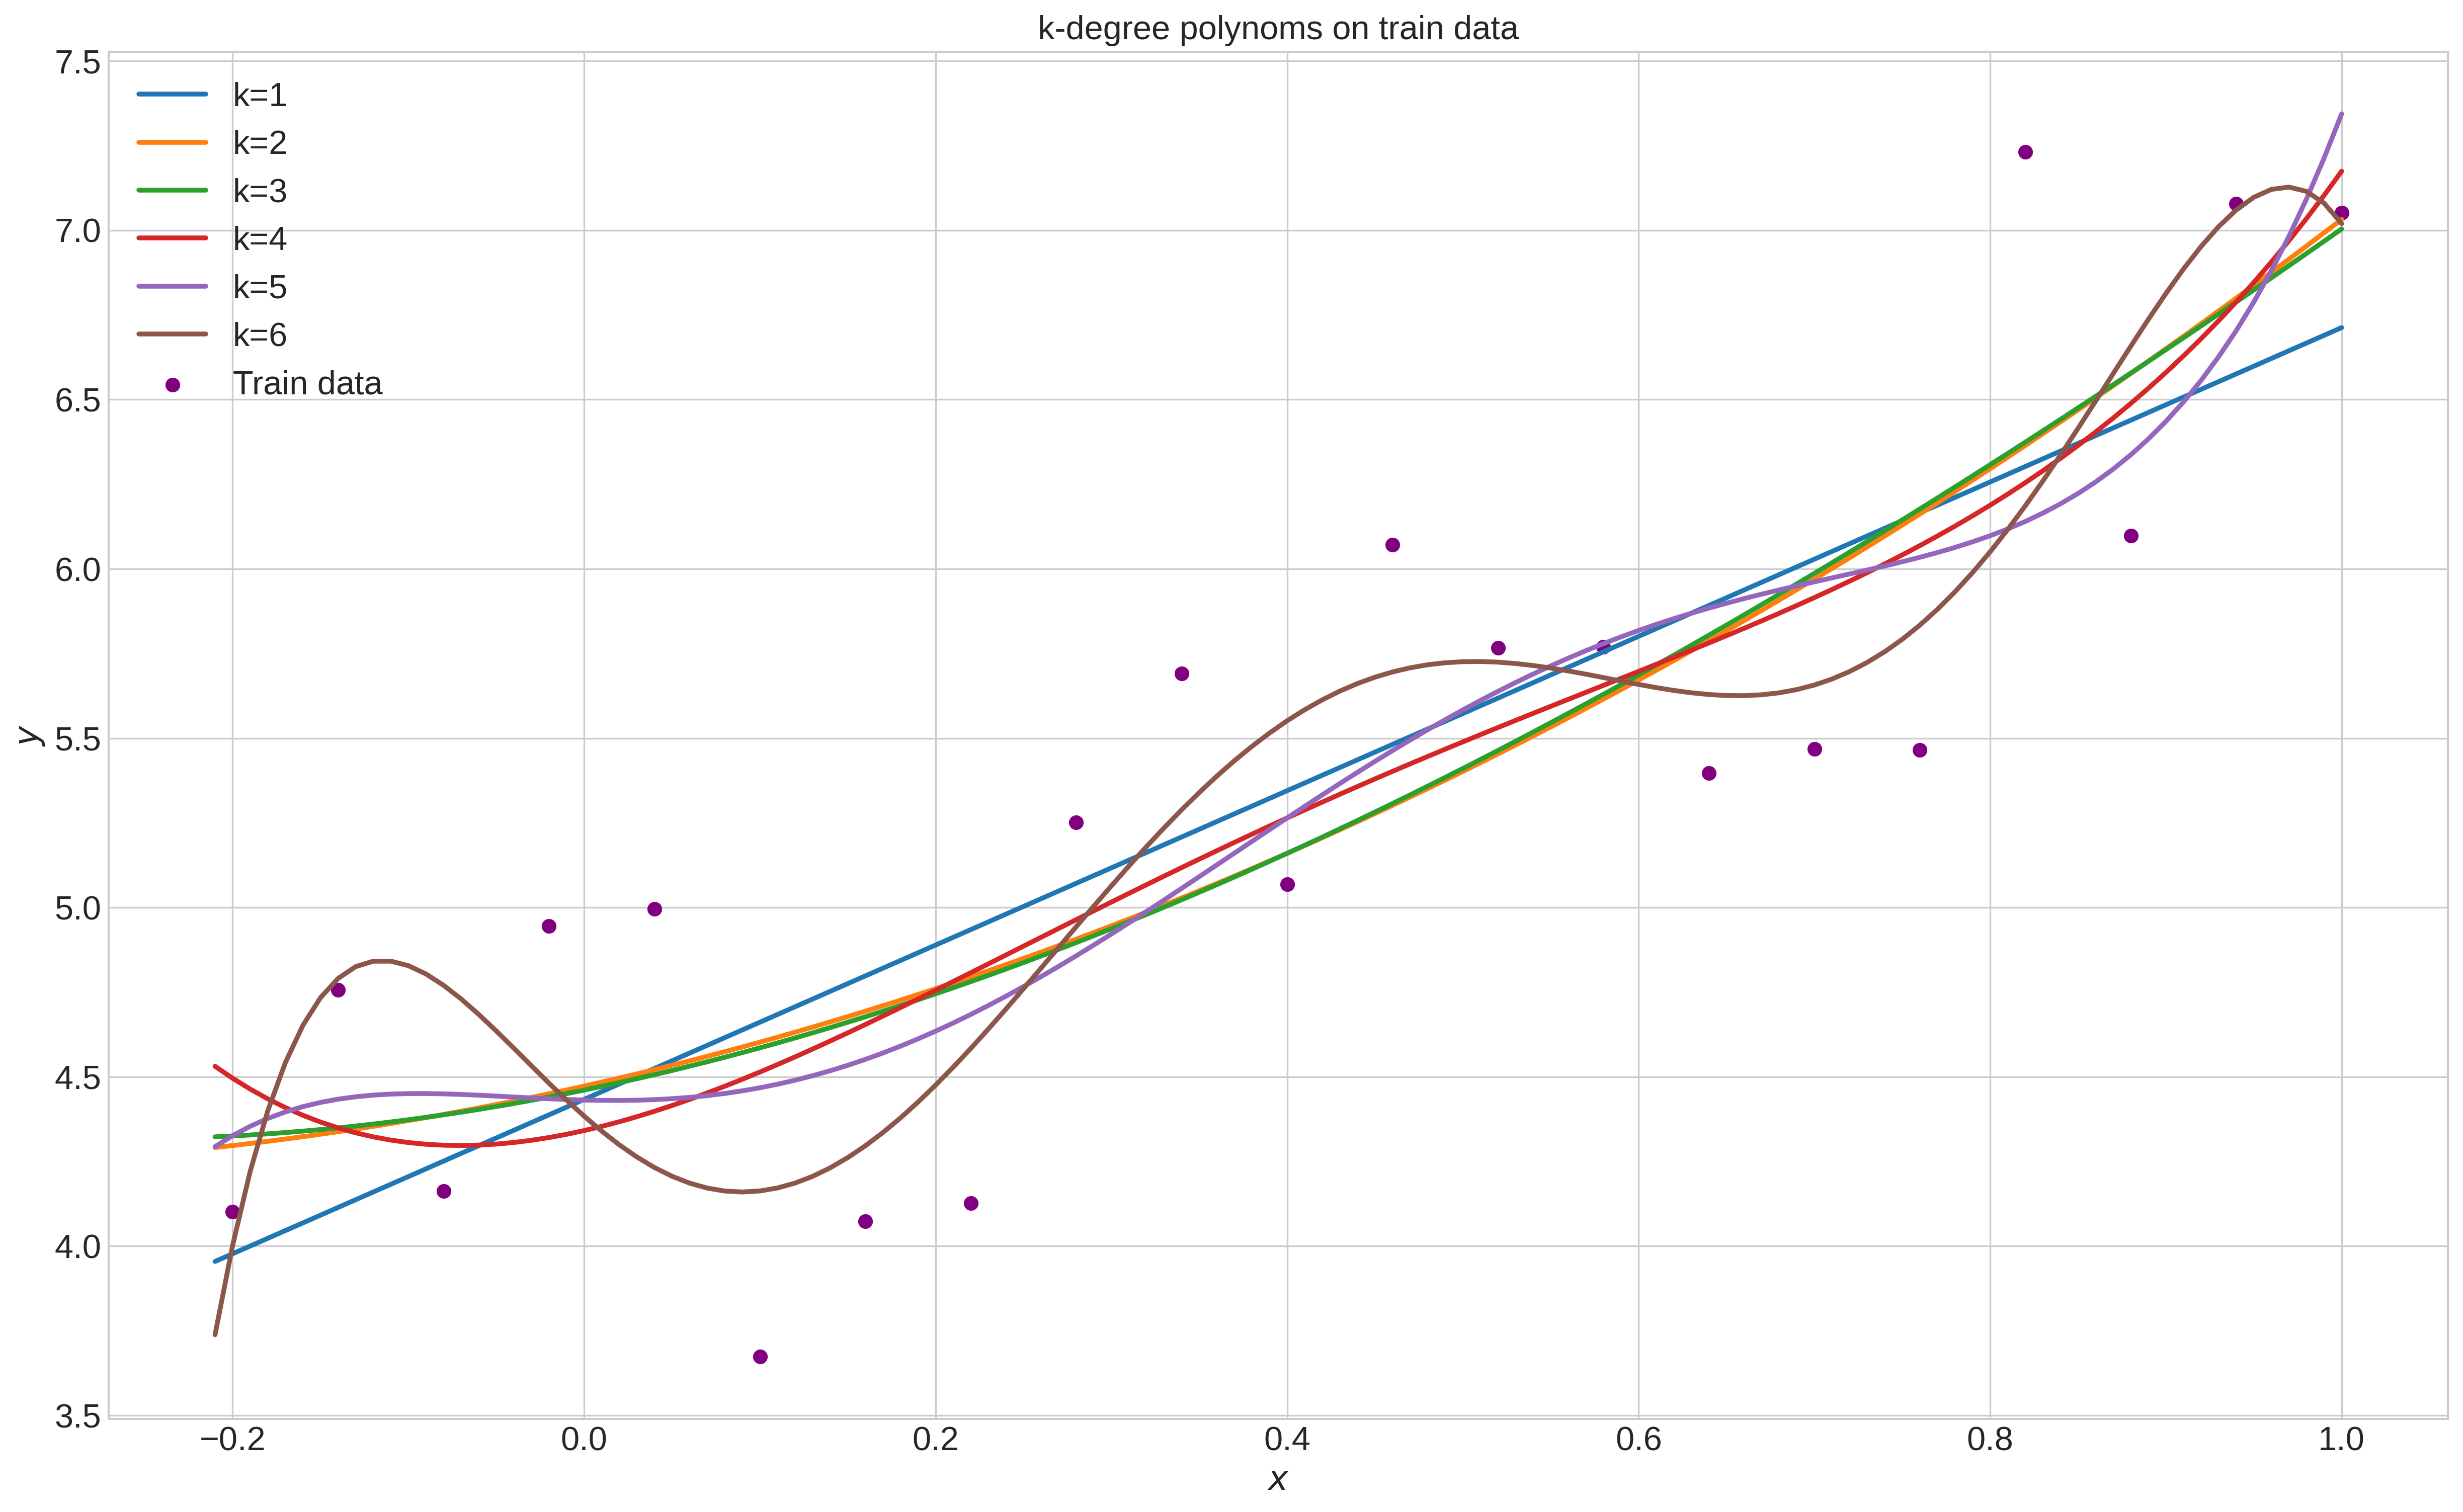

In [14]:
fig, ax = plt.subplots(
    figsize=(20, 12),
    dpi=300
)

for k in range(1, 7):
    poly = polynom(X_train, y_train, k)
    y_plot_k = [val_in_dot(poly, val) for val in x_plot_univ]
    ax.plot(x_plot_univ, y_plot_k, label="k=" + str(k), lw=2.3)
ax.scatter(X_train, y_train, c="purple", label="Train data")
ax.set_title("k-degree polynoms on train data")
ax.legend(loc=2)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
plt.show()

Что происходит с ошибкой при росте степени многочлена? Казалось бы, чем больше степень, тем более сложным будет многочлен и тем лучше он будет приближать нашу функцию. Подтверждают ли это ваши наблюдения? Как вам кажется, чем объясняется поведение ошибки на тестовых данных при $k = 10$?

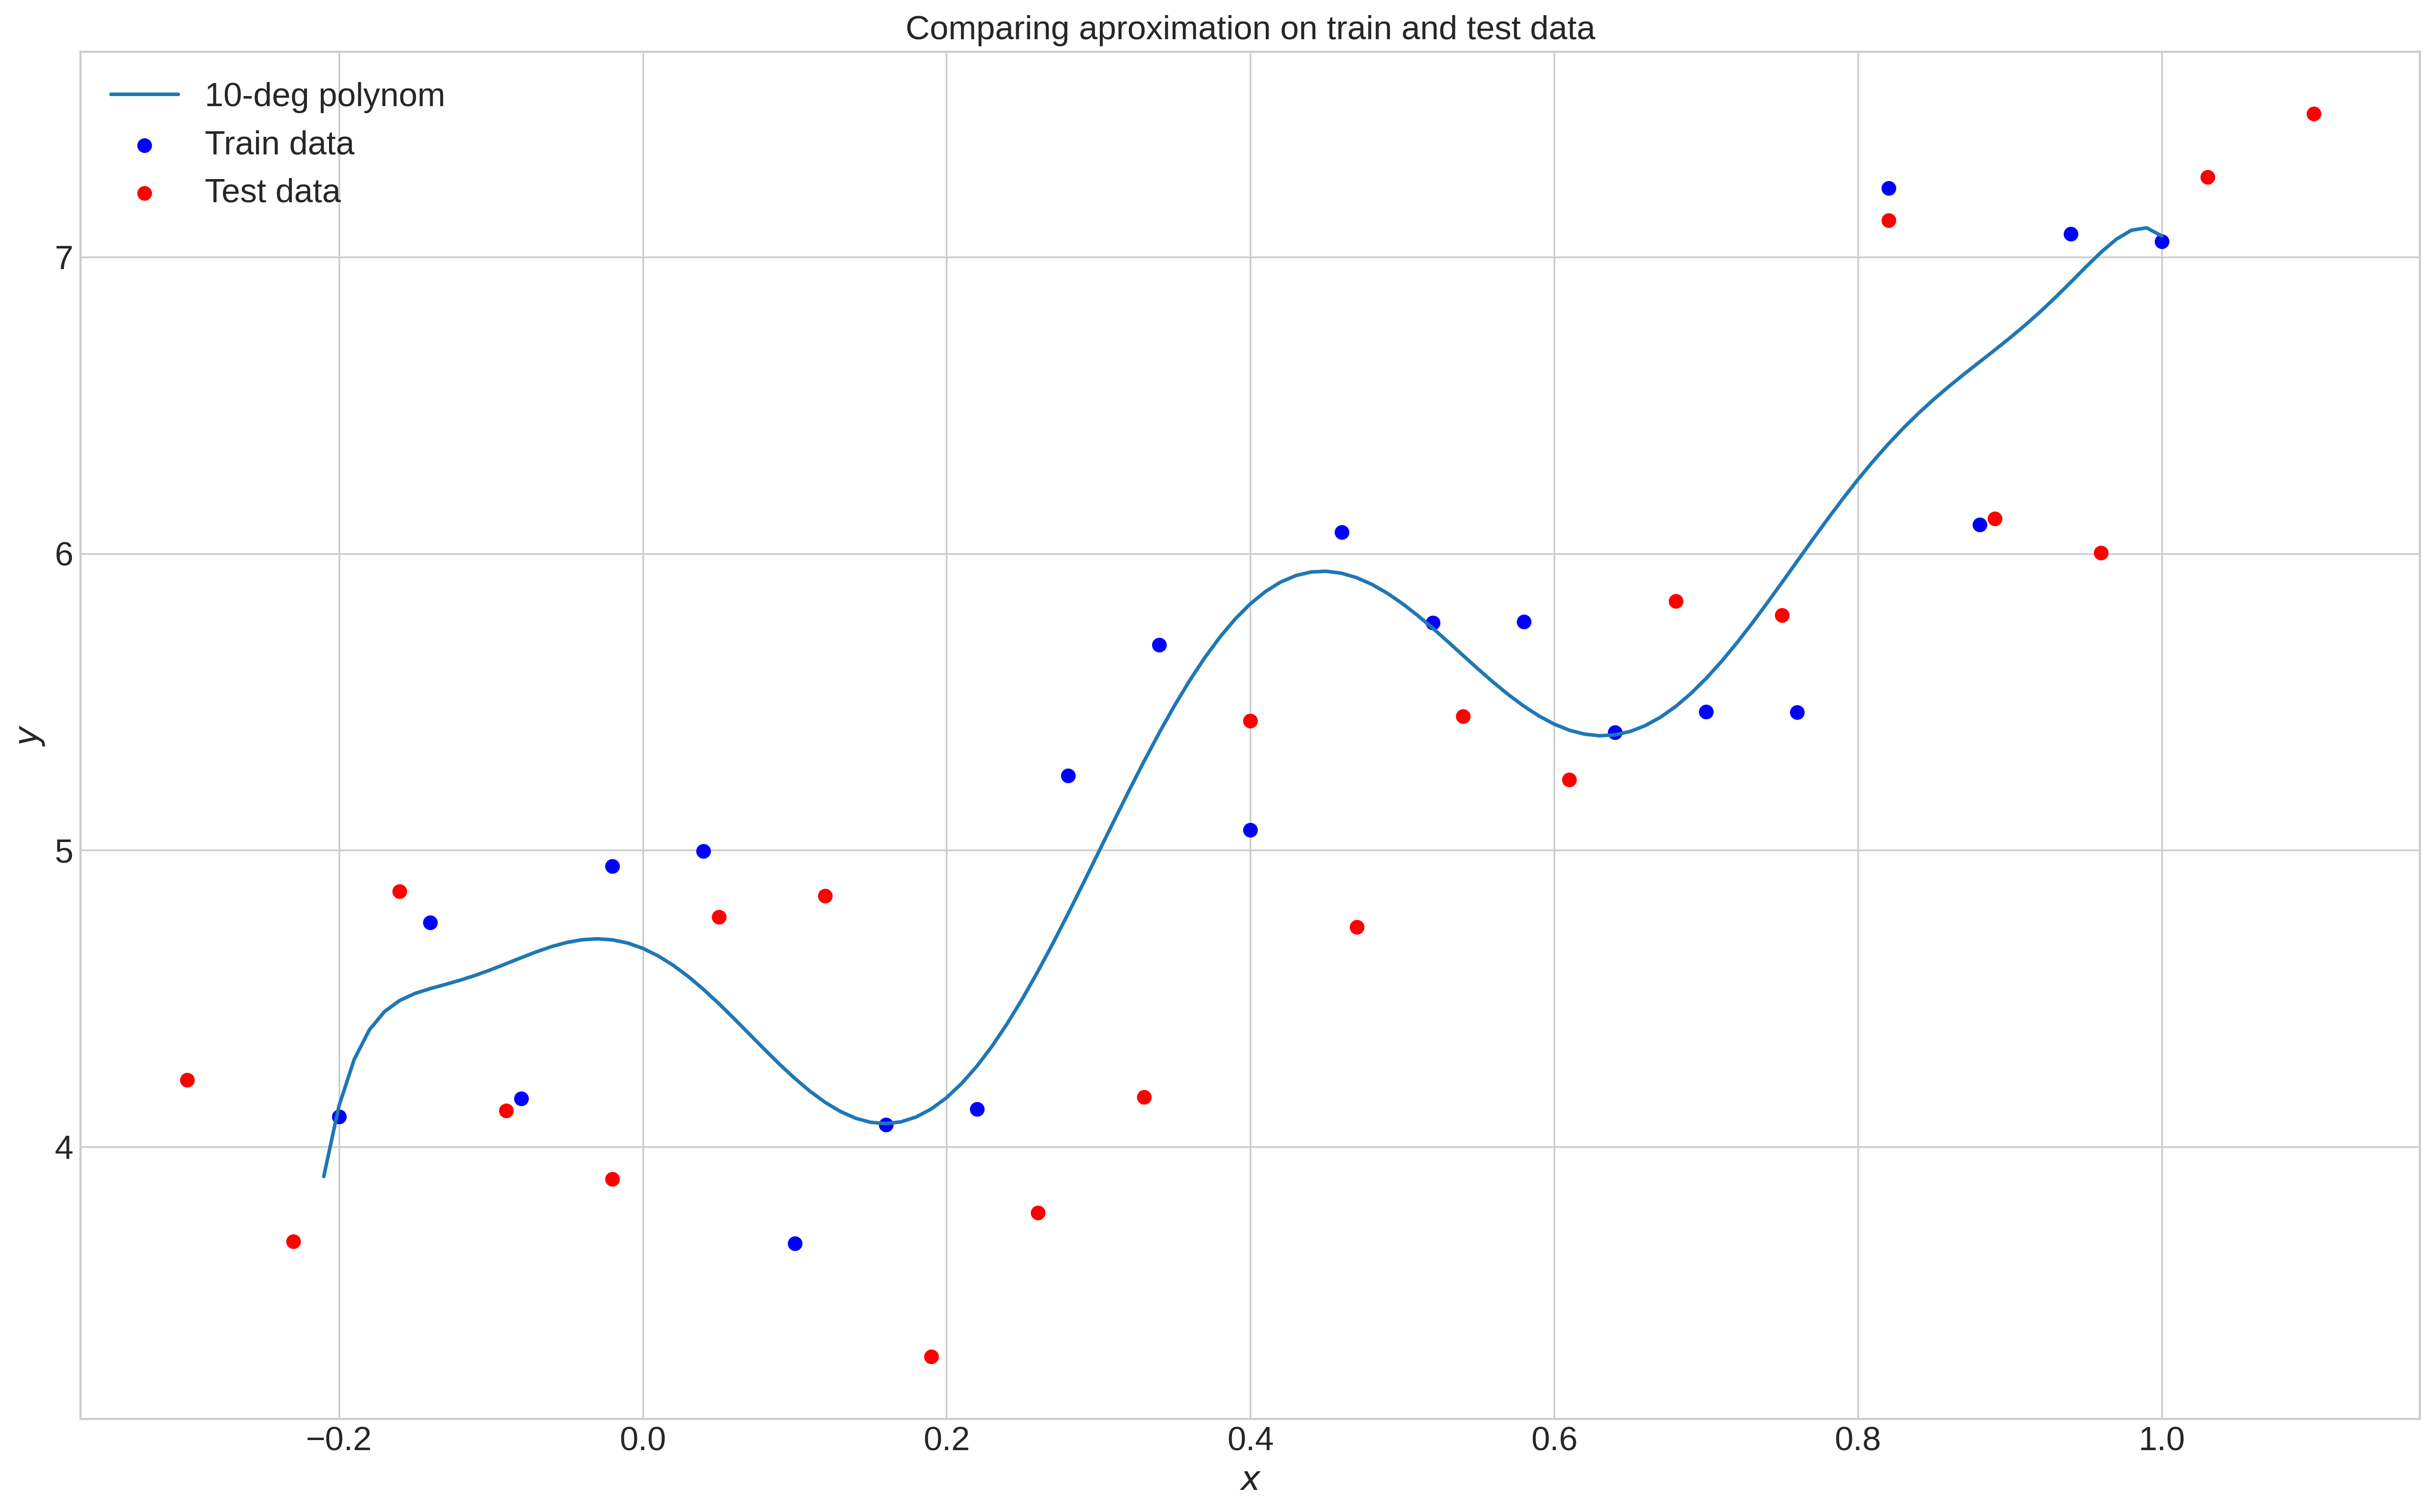

In [15]:
fig, ax = plt.subplots(
    figsize=(20, 12),
    dpi=300
)
polynom_10 = polynom(X_train, y_train, 10)
y_plot_10 = [val_in_dot(polynom_10, val) for val in x_plot_univ]

ax.plot(x_plot_univ, y_plot_10, label="10-deg polynom", lw=1.7)
ax.scatter(X_train, y_train, c="b", label="Train data")
ax.scatter(X_test, y_test, c="r", label="Test data")
ax.set_title("Comparing aproximation on train and test data")
ax.legend(loc=2)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
plt.show()

### Задание 2. Линейная регрессия (4 балла)

Скачайте файлы ``flats_moscow_mod.txt`` и ``flats_moscow_description.txt``. В первом из них содержатся данные о квартирах в Москве. Каждая строка содержит шесть характеристик некоторой квартиры, разделённые знаками табуляции; в первой строке записаны кодовые названия характеристик. Во втором файле приведены краткие описания признаков. Вашей задачей будет построить с помощью метода наименьших квадратов (линейную) зависимость между ценой квартиры и остальными доступными параметрами.

С помощью известных вам формул найдите регрессионные коэффициенты. Какой смысл имеют их знаки? Согласуются ли они с вашими представлениями о жизни?

Оцените качество приближения, вычислив среднеквадратическую ошибку.

<div style="
        background-color: #FFF3C2;
        padding: 6px;
        border-radius: 7px;
    ">
    Пусть $i-$ая квартирка имеет стоимость $p$, зависящую от признаков(регрессоров) $x_1, x_2, x_3, x_4, x_5$, каждый из которых что-то значит. Тогда линейную зависимость стоимости $p$ от регрессоров можно описать следующим образом:
    $$
    p(x_1, x_2, x_3, x_4, x_5) = a_1x_1 + a_2x_2 + a_3x_3 + a_4x_4 + a_5x_5
    $$
</div>

In [16]:
data = numpy.loadtxt('./flats_moscow_mod.txt', delimiter="\t", skiprows=1)

In [17]:
def linear_regression(data):
    data_cpy = data.copy()
    prices = numpy.array([data_cpy[:, 0]]).T
    regressors = data_cpy[:, 1:]
    Q, R = linalg.qr(regressors, mode="economic")
    pseudosolution = numpy.dot(
        numpy.dot(linalg.inv(R), Q.T),
        prices
    )
    return pseudosolution.reshape(-1)


In [18]:
def beautiful_print(data, coeffs):
    print("В выборке имеется {} регрессоров и {} их измерений".format(data.shape[1], data.shape[0]))
    print("Регрессионные коэффициенты:")
    print(
        '''
            \rКоэффициент для общей площади квартиры:\t\t{}
            \rКоэффициент для жилой площади квартиры:\t\t{}
            \rКоэффициент для площади кухни: \t\t\t{}
            \rКоэффициент для расстояния от центра:\t\t{}
            \rКоэффициент для расстояния от метро:\t\t{}
        '''.format(*coeffs))

In [19]:
regression_coeffs = linear_regression(data)
beautiful_print(data, regression_coeffs)
print("MSE линейной регрессии:\t", mean_squad_error(data[:, 1:], data[:, 0], regression_coeffs,
                               lambda coeffs, dots: sum([coeffs[i] * dots[i] for i in range(coeffs.size)])))

В выборке имеется 6 регрессоров и 2040 их измерений
Регрессионные коэффициенты:

Коэффициент для общей площади квартиры:		1.5547840700056872
Коэффициент для жилой площади квартиры:		1.174023304019212
Коэффициент для площади кухни: 			1.758058196784821
Коэффициент для расстояния от центра:		-3.916812196468745
Коэффициент для расстояния от метро:		-1.5513824563996543
        
MSE линейной регрессии:	 935.7887456487846


<div style="
        background-color: #FFF3C2;
        padding: 6px;
        border-radius: 7px;
    ">
Отметим, что первые три коэффициента положительны, т.е. чем больше соответствующие площади, тем выше будет стоимость квартиры. С другой стороны последние два коэффициента отрицательны, значит, чем больше (дальше) будут соответствующие расстояния, тем меньше будет стоимость квартиры.
    
Звучит совершенно логично. Единственное что мне наверное не понять, так это почему площадь кухни является более важным фактором, чем общая жилая площадь :/
</div>

### Усложнение модели

Конечно, никто не гарантирует, что объясняемая переменная (цена квартиры) зависит от остальных характеристик именно линейно. Зависимость может быть, например, квадратичной или логарифмической; больше того, могут быть важны не только отдельные признаки, но и их комбинации. Это можно учитывать, добавляя в качестве дополнительных признаков разные функции от уже имеющихся характеристик: их квадраты, логарифмы, попарные произведения.

В этом задании вам нужно постараться улучшить качество модели, добавляя дополнительные признаки, являющиеся функциями от уже имеющихся. Но будьте осторожны: чрезмерное усложнение модели будет приводить к переобучению. 

**Сравнение моделей**

Когда вы построите новую модель, вам захочется понять, лучше она или хуже, чем изначальная. Проверять это на той же выборке, на которой вы обучались, бессмысленно и даже вредно (вспомните пример с многочленами: как прекрасно падала ошибка на обучающей выборке с ростом степени!). Поэтому вам нужно будет разделить выборку на обучающую и тестовую. Делать это лучше случайным образом (ведь вы не знаете, как создатели датасета упорядочили объекты); рекомендуем вам для этого функцию `sklearn.model_selection.train_test_split`.

$$ p = a_1f(x_1, x_2, \cdots, x_5) + a_2f(x_1, x_2, \cdots, x_5) + a_3f(x_1, x_2, \cdots, x_5) + a_4f(x_1, x_2, \cdots, x_5) + a_5f(x_1, x_2, \cdots, x_5)$$

$$
f_i = \text{АД}\\
f_i(x) = x
$$

$$
x_i = \ln(x_i) ?
$$

#### Площадь квартиры не интересна, интересна жилая площадь.
#### Если площадь квартиры большая, а площадь жилая + кухни составляют > 0.5, то что остальное?

$$
x_1 = \text{площадь квартиры}\\
x_2 = \text{жилая}\\
x_3 = \text{кухня}\\
$$
Было:
$p = ax_1 + ax_2 +ax_3;$


Стало: 
$p = \sum\limits_{i=0}^5a_if(x_1, x_2, x_3)$

$$
f(x_1, x_2, x_3) = x_1 - x_2 -
$$

### Задание 3. Регуляризация (2 балла)

Вспомним, что задача линейной регрессии формулируется как задача нахождения проекции вектора значений объясняемой переменной $y$ на линейную оболочку $\langle x_1,\ldots,x_k\rangle$ векторов значений регрессоров. Если векторы $x_1,\ldots,x_k$ линейно зависимы, то матрица $X^TX$ вырожденна и задача не будет решаться (то есть будет, но не с помощью приведённой выше формулы). В жизни, по счастью, различные признаки редко бывают *в точности* линейно зависимы, однако во многих ситуациях они скоррелированы и становятся "почти" линейно зависимыми. Таковы, к примеру, зарплата человека, его уровень образования, цена машины и суммарная площадь недвижимости, которой он владеет. В этом случае матрица $X^TX$ будет близка к вырожденной, и это приводит к численной неустойчивости и плохому качеству решений; как следствие, будет иметь место переобучение. Один из симптомов этой проблемы &mdash; необычно большие по модулю компоненты вектора $a$.

Есть много способов борьбы с этим злом. Один из них &mdash; регуляризация. Сейчас мы рассмотрим одну из её разновидностей &mdash; **L2-регуляризацию**. Идея в том, чтобы подправить матрицу $X^TX$, сделав её "получше". Например, это можно сделать, заменив её на $(X^TX + \lambda E)$, где $\lambda$ &mdash; некоторый скаляр. Пожертвовав точностью на обучающей выборке, мы тем не менее получаем численно более стабильное псевдорешение $a = (X^TX + \lambda E)^{-1}X^Ty$ и снижаем эффект переобучения. Параметр $\lambda$ нужно подбирать, и каких-то универсальных способов это делать нет, но зачастую можно его подобрать таким, чтобы ошибка на тестовой выборке падала. 

Теперь давайте вспомним первую задачу. Если вы её сделали, то помните, что ошибка аппроксимации многочленом шестой степени довольно высокая. Убедитесь, что, используя регуляризацию с хорошо подобранным коэффициентом $\lambda$, ошибку на тестовой выборке можно сделать не больше, чем для многочлена оптимальной степени в модели без регрессии. Для этого $\lambda$ сравните $\det(X^TX)$ и $\det(X^TX + \lambda E)$.

In [20]:
X_matrix = []
def regulized_polynom(X_data, y_data, degree, lambd):
    global X_matrix
    X_data_cpy = X_data.copy()
    y_data_cpy = y_data.copy()
    X_matrix = numpy.array([numpy.ones(X_data_cpy.shape[0])]).T
    for deg in range(1, degree + 1):
        additional_column = numpy.array([X_data_cpy]).T ** deg
        X_matrix = numpy.concatenate((X_matrix, additional_column), 1)
    pseudosolution = numpy.dot(
        numpy.dot(
            linalg.inv(
                numpy.dot(X_matrix.T.copy(), X_matrix) + lambd * numpy.eye(X_matrix.shape[1])
            ),
            X_matrix.T.copy()
            ),
        y_data_cpy
    )
    return pseudosolution.reshape(-1)

In [21]:
from cmath import log
lmbd_range = numpy.arange(-5.1, 5.1, 0.1)
error_range = []
det_range = []
default_det_range = []
for lambd in lmbd_range:
    poly = regulized_polynom(X_train, y_train, 6, lambd)
    error_range.append(mean_squad_error(X_train, y_train, poly))
    det_range.append(numpy.real(log(
            linalg.det(numpy.dot(X_matrix.T, X_matrix) + lambd * numpy.eye(X_matrix.shape[1]))
    )))
    default_det_range.append(linalg.det(numpy.dot(X_matrix.T, X_matrix)))

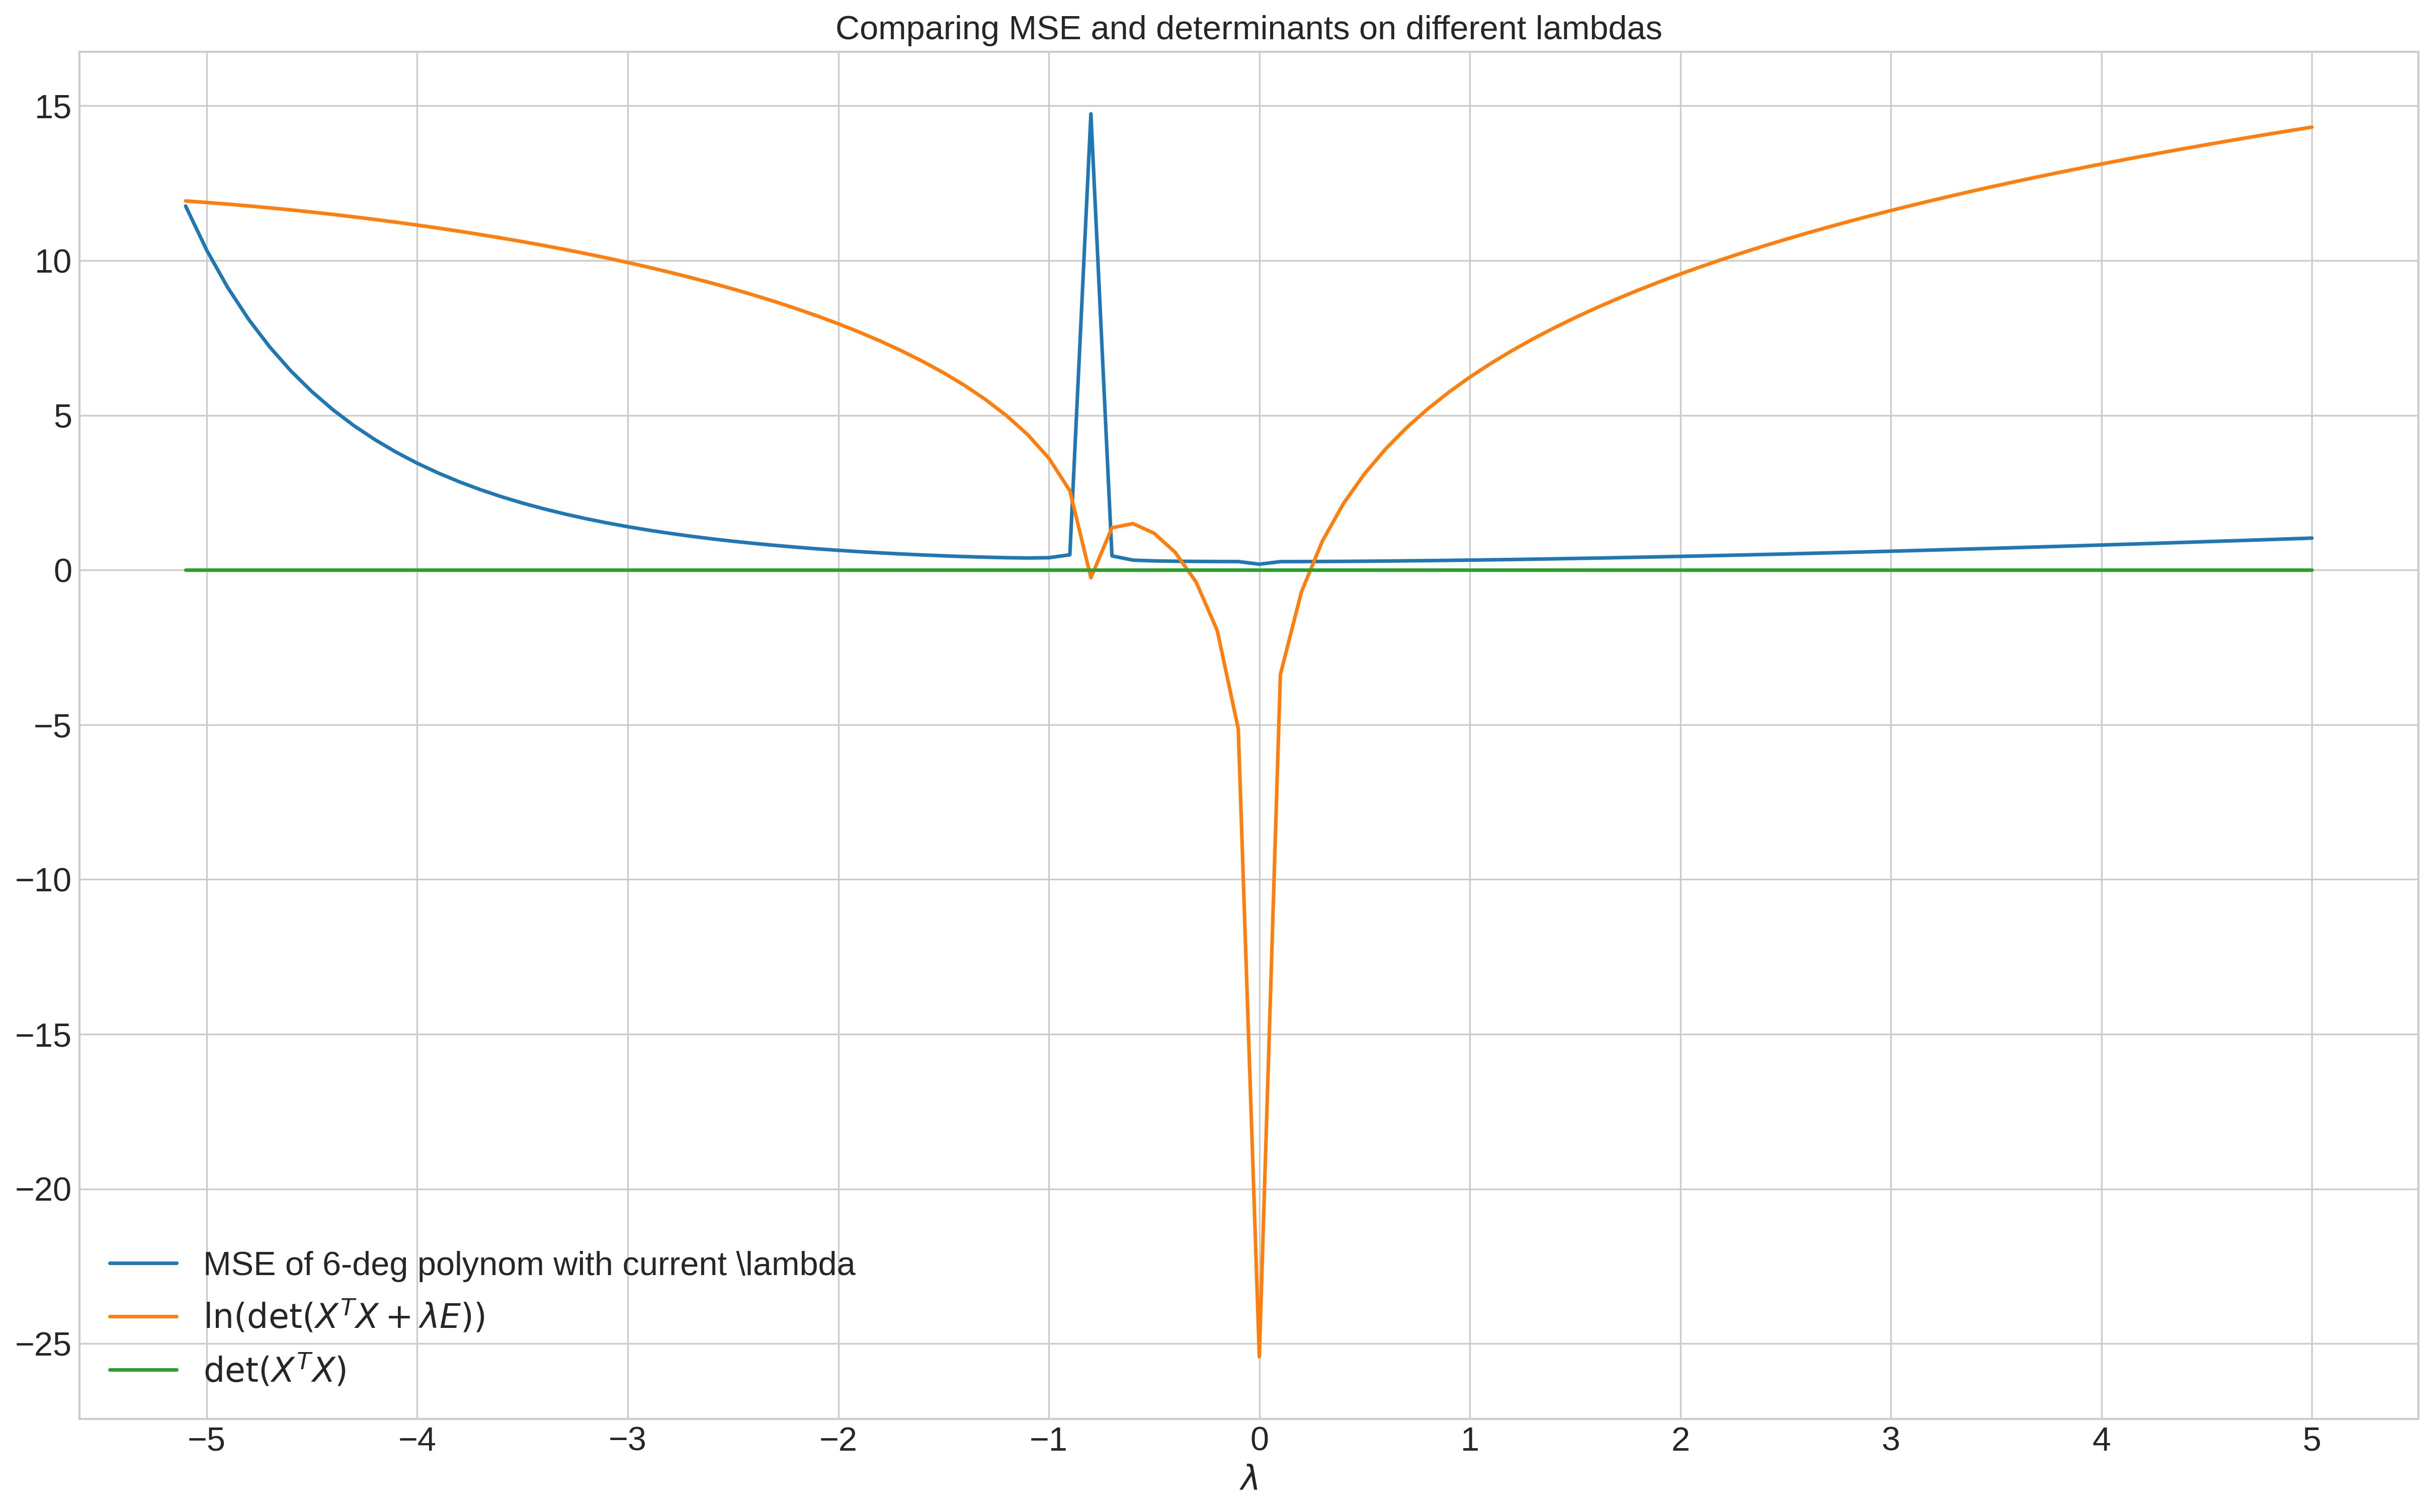

In [22]:
fig, ax = plt.subplots(
    figsize=(20, 12),
    dpi=300
)

ax.plot(lmbd_range, error_range, label=r'MSE of 6-deg polynom with current \lambda', lw=1.7)
ax.plot(lmbd_range, det_range, label=r'$\ln(\det(X^TX + \lambda E))$', lw=1.7)
ax.plot(lmbd_range, default_det_range, label=r'$\det(X^TX)$', lw=1.7)
ax.set_title("Comparing MSE and determinants on different lambdas")
ax.legend(loc=3)
ax.set_xlabel(r'$\lambda$')
plt.xticks(numpy.arange(-5, 5.1))
plt.show()

<div style="
        background-color: #FFF3C2;
        padding: 6px;
        border-radius: 7px;
    ">
Как мы видим, в окрестности нуля имеется наименьшее значение ошибки (если присмотреться), но при этом наблюдаются проблемы с определителем матрицы (он там и сам в окрестности нуля). Зато несколько правее, после того как определитель достигает значения $1$, ошибка растёт довольно медленно, в то время как значения отпределителя начинает стремительно увеличиваться. Если взять грубо, то значение $\lambda$ из отрезка $[0.5, 1]$ подойдёт нам идеально. Ну и почему бы не взять $\lambda = 0.5$.
</div>

In [23]:
from IPython.display import display, Math, Latex
lambd_a = 0.5
display(Math(r'MSE\ при\ таком\ выборе\ \lambda:' + str(
    mean_squad_error(X_train, y_train, regulized_polynom(X_train, y_train, 6, lambd_a)))))
display(Math(r'MSE\ для\ исходного\ многочлена:' + str(
    mean_squad_error(X_train, y_train, polynom(X_train, y_train, 6)))))
display(Math(r'Определитель\ матрицы\ (X^TX+\lambda E)\ при\ таком\ выборе\ \lambda:' + 
     str(linalg.det(numpy.dot(X_matrix.T, X_matrix) + lambd_a * numpy.eye(X_matrix.shape[1])))))
display(Math(r'Определитель\ матрицы\ (X^TX):' + 
     str(linalg.det(numpy.dot(X_matrix.T, X_matrix)))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<div style="
        background-color: #FFF3C2;
        padding: 6px;
        border-radius: 7px;
    ">
Мне нравится.
    
Почему при добавлении к нашей матрицы $X^TX$ единичной матрицы определитель результирующей матрицы так сильно поменялся? Дело в том, что, как мы видим, матрица $X^TX$ хоть и не была в точности вырожденной, но была очень близка к этому, т.е. в ней были (почти) линейно зависимые строки/столбцы. Добавляя к матрице $A$ матрицу $\lambda\cdot E$ мы вносим "возмущение" $\lambda$ в каждую строку и каждый столбец матрицы $A$, независимо от остальных строк/столбцов. Можно показать, что если $(-\lambda)$ не является собственным значением матрицы $A$ (есть подозрение, что нечто подобное и произошло в том месте на графике, где резкий взлёт значения ошибки совспал с падением значения определителя), то определитель матрицы $A + \lambda E$ не будет равен нулю. Ну, а дальше регулируя $\lambda$ мы можем подобрать впринцыпе любой определитель матрицы $A + \lambda E$.
</div> 

Нарисуйте на одном чертеже графики многочленов шестой степени, приближающих неизвестную функцию, для модели с регуляризацией и без. Чем первый из них выгодно отличается от второго?

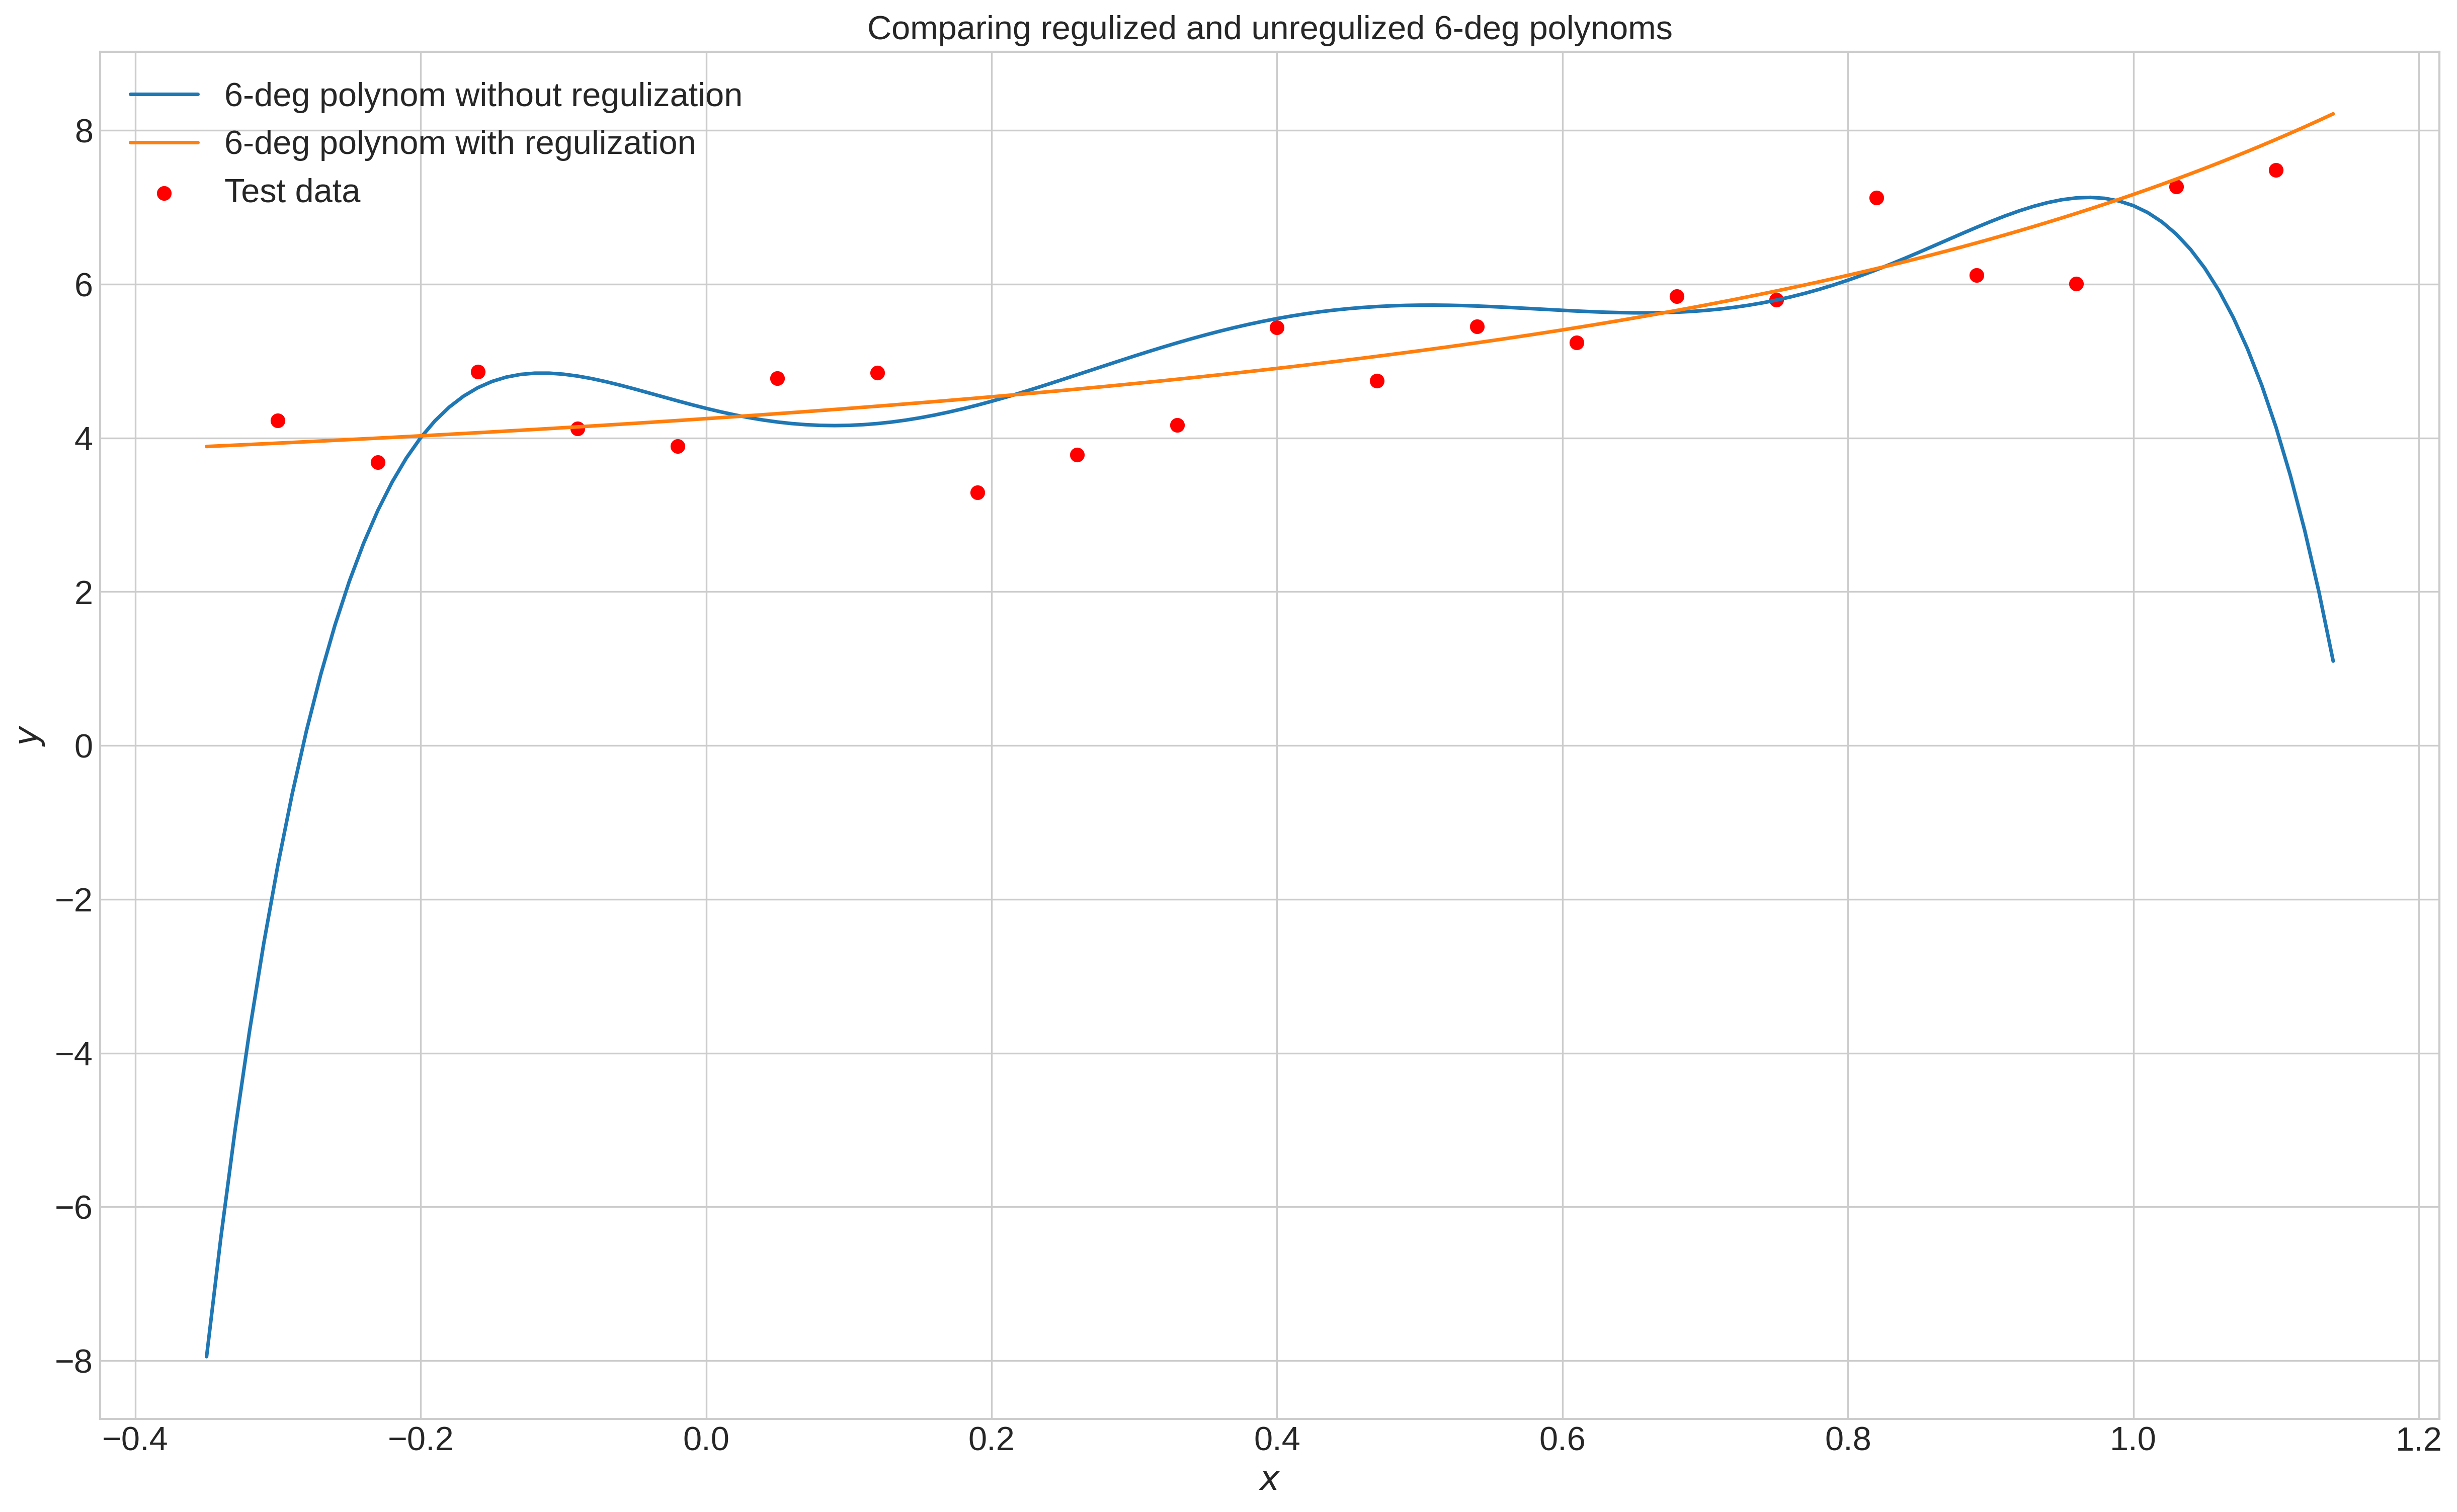

In [24]:
default_poly_6 = polynom(X_train, y_train, 6)
reg_poly_6 = regulized_polynom(X_train, y_train, 6, 1)

fig, ax = plt.subplots(
    figsize=(20, 12),
    dpi=300
)

default_yplot_6 = [val_in_dot(default_poly_6, dot) for dot in xplot]
reg_yplot_6 = [val_in_dot(reg_poly_6, dot) for dot in xplot]

ax.plot(xplot, default_yplot_6, label=r'6-deg polynom without regulization', lw=1.7)
ax.plot(xplot, reg_yplot_6, label=r'6-deg polynom with regulization', lw=1.7)
ax.scatter(X_test, y_test, c="r", label="Test data")
ax.set_title("Comparing regulized and unregulized 6-deg polynoms")
ax.legend(loc=2)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
plt.show()

<div style="
        background-color: #FFF3C2;
        padding: 6px;
        border-radius: 7px;
    ">
Гораздо лучше. Уже видно, что после регуляризации многочлен весьма сностно приблежает зависимость на тестовых данных, это говорит о том, что мы избавились от эффекта переобучения. Ниже сравню ошибки на тестовых данных, а так же количество отрицательных коэффициентов (их количество важно потому что ).
</div>

In [25]:
print("MSE многочлена на тестовой выборке до регуляризации:\t", mean_squad_error(X_test, y_test, default_poly_6))
print("MSE многочлена на тестовой выборке после регуляризации:\t", mean_squad_error(X_test, y_test, reg_poly_6))

MSE многочлена на тестовой выборке до регуляризации:	 2.5816929329431764
MSE многочлена на тестовой выборке после регуляризации:	 0.30821992357122674


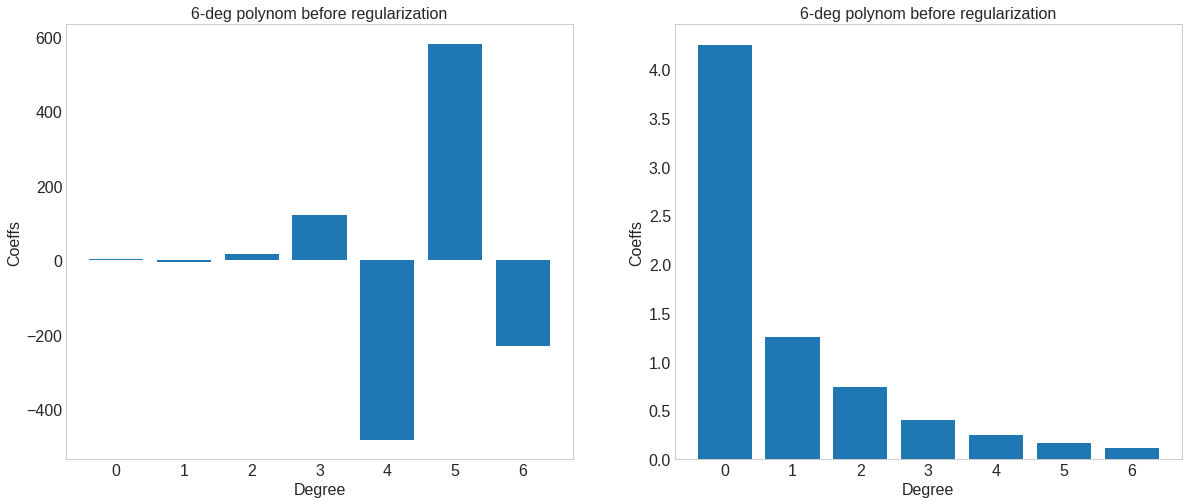

In [26]:
fig, (ax1, ax2) = plt.subplots(
    nrows=1, ncols=2,
    figsize=(20, 8)
)

ax1.bar(numpy.arange(7) + 0.5, numpy.hstack(default_poly_6))
ax1.grid(False)
ax1.set_title('6-deg polynom before regularization')
ax1.set_xlabel("Degree")
ax1.set_ylabel("Coeffs")
ax1.set_xticks(numpy.arange(7) + 0.5)
ax1.set_xticklabels(numpy.arange(7))

ax2.bar(numpy.arange(7) + 0.5, numpy.hstack(reg_poly_6))
ax2.grid(False)
ax2.set_title('6-deg polynom before regularization')
ax2.set_xlabel("Degree")
ax2.set_ylabel("Coeffs")
ax2.set_xticks(numpy.arange(7) + 0.5)
ax2.set_xticklabels(numpy.arange(7))
plt.show()

Попробуйте доказать, что вектор $a = (X^TX + \lambda E)^{-1}X^Ty$ является решением задачи

$$|Xa - y|^2 + \lambda|a|^2\rightarrow\min$$

Интуитивно это можно понимать так: мы ищем компромисс между минимизацией длины разности $|Xa - y|$ (то есть точностью решения задачи регрессии) и тем, чтобы компоненты вектора $a$ не становились слишком большими по модулю.

---

**Ваше решение напишите прямо здесь**

<div style="
        background-color: #FFF3C2;
        padding: 6px;
        border-radius: 7px;
    ">

Понадобится в будущем$\colon
\begin{array}{c}
(\sharp)\colon|v|^2 = v^Tv\\
(\flat)\colon\frac{d}{dv}v^TAv = (A + A^T)v
\end{array}
$
      
    
Пусть у нас есть функция $f(a) = |Xa - y|^2 + \lambda|a|^2$. Это функция от одной переменной, соответственно задача поиска её минимума сводится просто к поиску производной и приравниванию её к нулю. Перепишем нашу функцию с использованием $(\sharp)$:
    
$f(a) = (Xa - y)^T(Xa - y) + \lambda(a^Ta)$
    
А теперь найдём производную:
\begin{align*}
&f'(a) = [(Xa - y)^T(Xa - y)]' + \lambda(a^Ta)' = [(a^TX^T - y^T)(Xa - y)]' + \lambda\underbrace{(a^TEa)'}_{(\flat)} = (a^T\underbrace{X^TX}_{= X_t}a - a^TX^Ty - y^TXa - y^Ty)' +\\
&+ \lambda(E + E^T)a = (a^TX_ta - (y^TXa)^T - y^TXa - y^Ty)' + \underbrace{\lambda2}_{2\lambda}\underbrace{Ea}_{a} = (X_t + X_t^T)a - 2y^TX + 2\lambda a = (X^TX + X^TX)a - 2y^TX + 2\lambda a =\\
&=2X^TXa - 2y^TX + 2\lambda a
\end{align*}
Чуть не умер. Теперь приравняем производную к нулю и решим полученное уравнение:
\begin{align*}
&f'(a) = 2X^TXa - 2y^TX + 2\lambda a = 0\\
&X^TXa - y^TX + \lambda a = 0\\
&(X^TX + \lambda E)a = y^TX\\
&a = (X^TX + \lambda E)^{-1}y^TX\ \  (\text{Есстественно, в этот момент мы верим, что }(-\lambda) \notin 
    \text{spec}(X^TX))\ \ \blacksquare
\end{align*}
</div>

### Задание 4. Онлайн-обучение линейной регрессии (3 балла)

Раньше мы работали в ситуации, когда объекты $x_i$ и значения $y_i$ даны с самого начала и всегда доступны. Допустим теперь, что пары $(x_i, y_i)$ поступают к нам по одной и мы не можем себе позволить хранить их все в памяти (это может быть актуально, например, если вы пытаетесь обучить модель на устройстве со сравнительно небольшим количеством оперативной памяти: скажем, на мобильном телефоне или на бортовом компьютере спутника связи). В этом случае нам нужно уметь решать следующую задачу:

**Известно:** решение задачи регрессии для датасета $(x_1, y_1),\ldots,(x_t,y_t)$;

**На вход поступает:** новая пара $(x_{t+1}, y_{t+1})$;

**Требуется:** быстро (за время, не зависящее от $t$) отыскать решение задачи регрессии для расширенного датасета $(x_1, y_1),\ldots,(x_t,y_t),(x_{t+1}, y_{t+1})$.

Эту задачу мы будем решать в два этапа.

**Этап 1.** Введём обозначения $X_{(t)} = (x_1\ldots x_t)$ и $y_{(t)} = (y_1,\ldots,y_t)^T$. Тогда, как мы хорошо помним, решение задачи регрессии для датасета $(x_1, y_1),\ldots,(x_t,y_t)$ имеет вид $\hat{a}_{(t)} = \left(X^T_{(t)}X_{(t)}\right)^{-1}X^T_{(t)}y_{(t)}$. Размеры матриц $X^T_{(t)}X_{(t)}$ и $X^T_{(t)}y_{(t)}$ не зависят от $t$, поэтому их мы, пожалуй, можем себе позволить хранить в памяти.

И вот ваше первое задание в этом разделе: придумайте алгоритм, принимающий на вход матрицы $X^T_{(t)}X_{(t)}$ и $X^T_{(t)}y_{(t)}$, а также пару $(x_{t+1}, y_{t+1})$ и вычисляющий матрицы $X^T_{(t+1)}X_{(t+1)}$ и $X^T_{(t+1)}y_{(t+1)}$. Сложность вашего алгоритма не должна зависеть от $t$!

--

**Описание вашего алгоритма напишите прямо здесь**

<div style="
        background-color: #FFF3C2;
        padding: 6px;
        border-radius: 7px;
    ">
\begin{align*}
x_i = (x_{k1},\ x_{i2,}\ \ldots\ x_{ik}) \Rightarrow X_{(t)} = 
\begin{pmatrix}
x_{11} & \cdots & x_{1k}\\
x_{21} & \cdots & x_{2k}\\
\vdots & \ddots & \vdots\\
x_{t1} & \cdots & x_{tk}\\
\end{pmatrix},
&&& y_i \in \mathbb{R}
\end{align*}
    
Тогда $X_{(t)}^TX_{(t)} \in \mathbb{R}^{k\times k}$, т.е. не зависит от $t$. Заметим, что $X_{(t+1)}^TX_{(t+1)}$ так же не зависит от $k$. Запишем произведение матриц $X_{(t)}^T$ и $X_{(t)}$ по определению:
$$
(X_{(t)}^TX_{(t)})_{i,j} = \sum\limits_{r=1}^tx_{ir}x_{rj}
$$
Запишем произведение матриц $X_{(t+1)}^T$ и $X_{(t+1)}$ по определению:
$$
(X_{(t+1)}^TX_{(t+1)})_{i,j} = \sum\limits_{r=1}^{t+1}x_{ir}x_{rj} = \sum\limits_{r=1}^tx_{ir}x_{rj} + 
x_{i,t+1}x_{t+1,j} = (X_{(t)}^TX_{(t)})_{ij}) + x_{i,t+1}x_{t+1,j}
$$
Получили, что матрицу $X_{(t+1)}^TX_{(t+1)}$ можно разложить в сумму матриц $X_{(t)}^TX_{(t)}$ и 
$x_{t+1}^Tx_{t+1}$.
    
Проделаем аналогичную процедуру для вектора $X_{(t+1)}^Ty_{(t+1)}$:
$$
(X_{(t+1)}^Ty_{(t+1)})_i = \sum\limits_{r=1}^{t+1}x_{ir}y_r = \sum\limits_{r=1}^tx_{ir}y_r + 
x_{i,t+1}y_{t+1}
$$
Аналогично получаем, что вектор $X_{(t+1)}^Ty_{(t+1)}$ можно разложить в сумму векторов $X_{(t)}^Ty_{(t)}$ и 
$x_{(t+1)}^Ty_{(t+1)}$.
    
Мы научили получать то, что нужно, теперь обсудим сложность:
\begin{align*}
&\text{Время:}&&\text{Память:}\\
&\underline{O}(k^2) - \text{произведение векторов } x_i^Tx_i
&&\underline{O}(k^2) - \text{храним матрицу } X_{(t)}^TX_{(t)}\\
&\underline{O}(k^2) - \text{сложение матриц } X_{(t)}^TX_{(t)} \text{ и } x_i^Tx_i
&&\underline{O}(k) - \text{храним вектор } X_{(t)}^Ty_{(t)}\\
&\underline{O}(k) - \text{умножаем вектор } x_i^T \text{ на число } y_i\\
&\underline{O}(k) - \text{складываем векторы } X_{(t)}^Ty_{(t)} \text{ и } x_{(t+1)}^Ty_{(t+1)}\\
\end{align*}
Итого получается, что алгоритм работает за $\underline{O}(k^2)$ по времени и за $\underline{O}(k^2)$ по памяти, где $k$ - число признаков объекта $x_i$ в нашей выборке. Очевидно, что от $t$ здесь ничего не зависит.
</div>

**Этап 2.** Теперь настало время написать немного кода и порисовать красивые картинки. Вам нужно будет реализовать симуляцию онлайн-обучения регрессии для задачи приближения функции (в данном случае $f_{true}(x) = 2x\sin(x) + x^2 - 1$; все значения искажены небольшим нормальным шумом) многочленом степени не выше 5.

In [ ]:
from IPython.display import clear_output

f_true = lambda x: 2*x*np.sin(5*x) + x**2 - 1 # this is the true function

# We need this to make the plot of f_true:
x_grid = np.linspace(-2,5,100) # 100 linearly spaced numbers
x_grid_enl = np.hstack((x_grid.reshape((100,1))**j for j in range(6)))
y_grid = f_true(x_grid)


for i in range(200):

    x_new = np.random.uniform(-2, 5)
    y_new = f_true(x_new) + 2*np.random.randn()
    
    # your code goes here
    
    # the rest of code is just bells and whistles
    if (i+1)%5==0:
        clear_output(True)
        plt.plot(x_grid,y_grid, color='blue', label='true f')
        plt.scatter(x_new, y_new, color='red')
        
        # your code goes here
        y_pred = #...
        
        plt.scatter(x_grid, y_pred, color='orange', linewidth=5, label='predicted f')
        
        plt.legend(loc='upper left')
        plt.show()

### Добавление. QR-разложение

**QR-разложением** матрицы $A$ (не обязательно квадратной) мы будем называть её представление в виде $A = QR$, где $Q$ &mdash; матрица с ортонормированными столбцами, а $R$ &mdash; верхнетреугольная матрица.

Смысл QR-разложения следующий. Пусть $a_1,\ldots,a_m$ &mdash; столбцы матрицы $A$, $q_1,\ldots,q_t$ &mdash; столбцы матрицы $Q$. Тогда $q_1,\ldots,q_t$ &mdash; это ортонормированный базис в подпространстве, являющемся линейной оболочкой векторов $a_1,\ldots,a_m$, а в матрице $R$ записаны коэффициенты, с помощью которых $a_i$ выражаются через $q_1,\ldots,q_t$.

Находить QR-разложение заданной матрицы можно разными способами. Мы познакомим вас не с самым лучшим из них, но по крайней мере с наиболее простым концептуально. Заметим, что ортогональный базис линейной оболочки можно найти с помощью ортогонализации Грама-Шмидта. При этом коэффициенты из матрицы $R$ получаются в качестве побочного продукта этого процесса:

```python
for j = 1...n:
    q_j = a_j
    for i = 1,...,j-1:
        r_ij = (q_i, a_j)
        q_j = q_j - r_ij * q_i
    r_jj = |q_j|
    if r_jj == 0: # a_j in <a_1,...,a_j-1>
        # What would you do in this case?..
    q_j = q_j / r_jj
```

Для нахождения QR-разложения вы можете использовать библиотечную функцию `scipy.linalg.qr`.

Поскольку лабораторная про линейную регрессию, не так-то просто замять вопрос о том, какое же отношение QR-разложение имеет к задаче регрессии. Упомянем одно из возможных применений.

Допустим, мы нашли QR-разложение матрицы $X$, а именно: $X = QR$. Тогда
$$X^TX = (QR)^T(QR) = R^TQ^TQR = R^TR$$

Поскольку в задаче регрессии матрица $X$ обычного полного ранга (то есть её столбцы линейно независимы), матрица $R$ будет квадратной. Благодаря этому нашу обычную формулу для набора регрессионных коэффициентов $\hat{a}$ можно переписать в следующем виде:

$$\hat{a} = (X^TX)^{-1}X^Ty = (R^TR)^{-1}(QR)^Ty = R^{-1}(R^T)^{-1}R^TQ^Ty = R^{-1}Q^Ty$$

Как видите, формула стала проще. Более того, зачастую обращение матрицы $R$ может быть численно более устойчиво, чем обращение матрицы $X^TX$.